In [1]:
import pygal
from IPython.display import SVG, display
from memair import Memair
# Use Otto the sandbox user's access token or create your own at https://memair.com/temporary_access_token
access_token = '0000000000000000000000000000000000000000000000000000000000000000'

user = Memair(access_token)

In [2]:
response = user.query('''
    mutation { 
      CreateInsight(
        chart: {
          title: "Social Media Usage"
          type: line
          category_axis: ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
          series: [
            {label: "facebook" data: [2.1, 2.4, 1.8, 4.3, 2.7]}
            {label: "twitter" data: [1.6, 0.4, 0.8, 2.4, 1.2]}
          ]
        }
      )
      {
        id
        chart
      }
    }
''')
chart = response['data']['CreateInsight']['chart']
response

{'data': {'CreateInsight': {'id': '10',
   'chart': {'title': 'Social Media Usage',
    'type': 'line',
    'category_axis': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'series': [{'label': 'facebook', 'data': [2.1, 2.4, 1.8, 4.3, 2.7]},
     {'label': 'twitter', 'data': [1.6, 0.4, 0.8, 2.4, 1.2]}]}}}}

In [3]:
data = []
for series in chart['series']:
    data.append([series['label'], series['data']])
data

[['facebook', [2.1, 2.4, 1.8, 4.3, 2.7]],
 ['twitter', [1.6, 0.4, 0.8, 2.4, 1.2]]]

In [4]:
stackedline_chart = pygal.StackedLine(fill=True)
stackedline_chart.title = "Hours spend on Social Media"
stackedline_chart.x_labels = chart['category_axis']

In [5]:
for label, data_points in data:
    stackedline_chart.add(label, data_points)

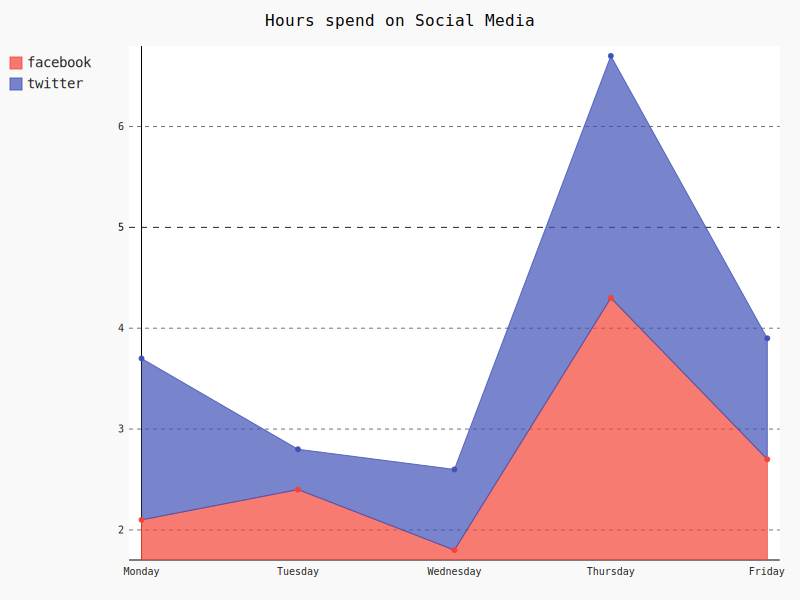

In [6]:
display(SVG(stackedline_chart.render(disable_xml_declaration=True)))